In [1]:
from astropy.io import fits
from spectral_cube import SpectralCube

In [2]:
cd FITS

/orange/adamginsburg/brick_alma_linesurvey/FITS


In [3]:
ls

member.uid___A001_X1465_X3a33.BrickMaser_sci.spw71.cube.I.manual.image.pbcor.fits
member.uid___A001_X1465_X3a43.BrickMaser_sci.spw69.cube.I.manual.image.pbcor.fits
member.uid___A001_X1465_X3a5b.BrickMaser_sci.spw25.cube.I.pbcor.fits
member.uid___A001_X1465_X3a5b.BrickMaser_sci.spw25.mfs.I.pbcor.fits
member.uid___A001_X1465_X3a5b.BrickMaser_sci.spw27.cube.I.pbcor.fits
member.uid___A001_X1465_X3a5b.BrickMaser_sci.spw27.mfs.I.pbcor.fits
member.uid___A001_X1465_X3a5b.BrickMaser_sci.spw29.cube.I.pbcor.fits
member.uid___A001_X1465_X3a5b.BrickMaser_sci.spw29.mfs.I.pbcor.fits
member.uid___A001_X1465_X3a5b.BrickMaser_sci.spw31.cube.I.pbcor.fits
member.uid___A001_X1465_X3a5b.BrickMaser_sci.spw31.mfs.I.pbcor.fits
member.uid___A001_X1465_X3a63.BrickMaser_sci.spw23.cube.I.pbcor.fits
member.uid___A001_X1465_X3a63.BrickMaser_sci.spw23.mfs.I.pbcor.fits
member.uid___A001_X1465_X3a63.BrickMaser_sci.spw25.cube.I.pbcor.fits
member.uid___A001_X1465_X3a63.BrickMaser_sci.spw25.mfs.I.pbcor.fits
member.uid___A

In [7]:
import glob
import warnings

In [12]:
%matplotlib inline
import pylab as pl

In [23]:
from astropy import units as u

(80, 150, 0.99, 1.02)

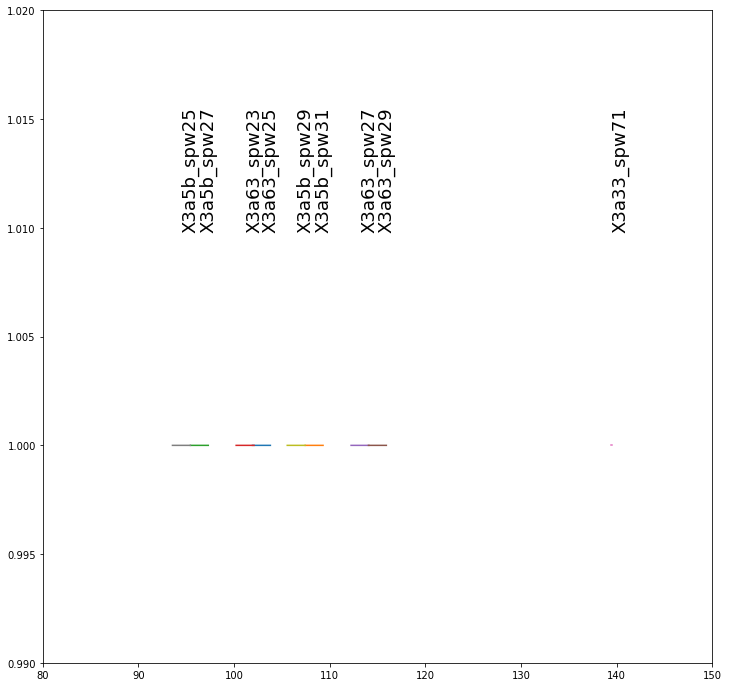

In [36]:
pl.figure(figsize=(12,12))
pl.clf()
for fn in glob.glob("*cube*fits"):
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        cube = SpectralCube.read(fn)
    ctr = cube.spectral_axis.to(u.GHz).value.mean()
    if ctr > 150:
        continue
    pl.plot(cube.spectral_axis.to(u.GHz).value, np.ones(cube.shape[0]))
    name = fn.split("_")[5].split('.')[0] + "_" + fn.split(".")[3]
    #print(name)
    pl.annotate(xy=(ctr, 1.01), s=name, rotation=90, fontsize=18)
pl.axis((80, 150, 0.99, 1.02))